In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
from scipy.stats import ttest_ind
from scipy.stats import ks_2samp


In [ ]:
df=pd.read_excel('cluster analysis.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52245 entries, 0 to 52244
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Individual LookupID                        52245 non-null  int64  
 1   Age                                        52245 non-null  int64  
 2   Birth Date                                 52245 non-null  int64  
 3   Age Range Category                         52245 non-null  int64  
 4   Age Range                                  52245 non-null  object 
 5   Regional Category Codes                    52245 non-null  int64  
 6   BUSN Volunteer (either type) (Y/N)         52245 non-null  int64  
 7   HH Affinity Total (parent, child, spouse)  52245 non-null  int64  
 8   fy23 Engagement excl $$                    52245 non-null  int64  
 9   fy24 Engagement excl $$                    52245 non-null  int64  
 10  BUSN Affiliation-Emplo

**K-Means Method**

In [ ]:
# Select relevant features for clustering
features = [
    "Age Range Category", "Regional Category Codes", "BUSN Volunteer (either type) (Y/N)",
    "HH Affinity Total (parent, child, spouse)", "fy23 Engagement excl $$", "fy24 Engagement excl $$",
    "BUSN Affiliation-Employment", "BUSN Affiliation-Student Involvement",
    "Affiliation- BUSN score minus giving", "UIUC Affiliation minus giving",
    "UIUC Affiliation Employment", "UIUC Affiliation-Student Involvement"
]


In [ ]:
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:

# Choose an optimal k (based on elbow and silhouette analysis before)
optimal_k = 4  # Adjust based on the graphs

# Fit the K-Means model with the selected number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

         Age Range Category  Regional Category Codes  \
Cluster                                                
0                  5.062371                 1.951160   
1                  3.759635                 2.069980   
2                  2.713529                 2.413895   
3                  3.812003                 2.378311   

         BUSN Volunteer (either type) (Y/N)  \
Cluster                                       
0                                       0.0   
1                                       1.0   
2                                       0.0   
3                                       0.0   

         HH Affinity Total (parent, child, spouse)  fy23 Engagement excl $$  \
Cluster                                                                       
0                                         0.180284                 0.325000   
1                                         0.421907                 1.136917   
2                                         0.437962              

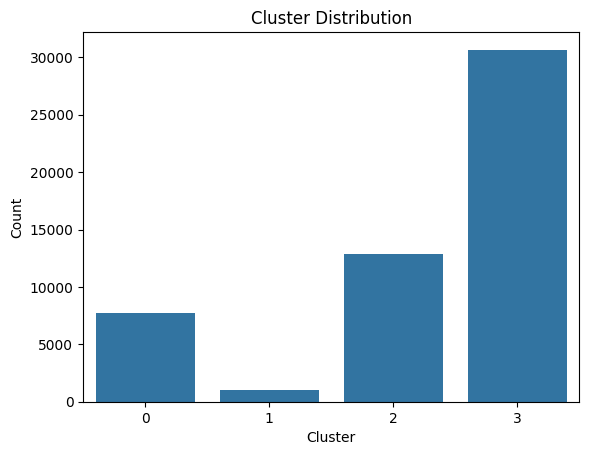

In [ ]:
# Analyze cluster characteristics
cluster_means = df.groupby("Cluster")[features].mean()
print(cluster_means)

# Visualize cluster distribution
sns.countplot(x=df["Cluster"])
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


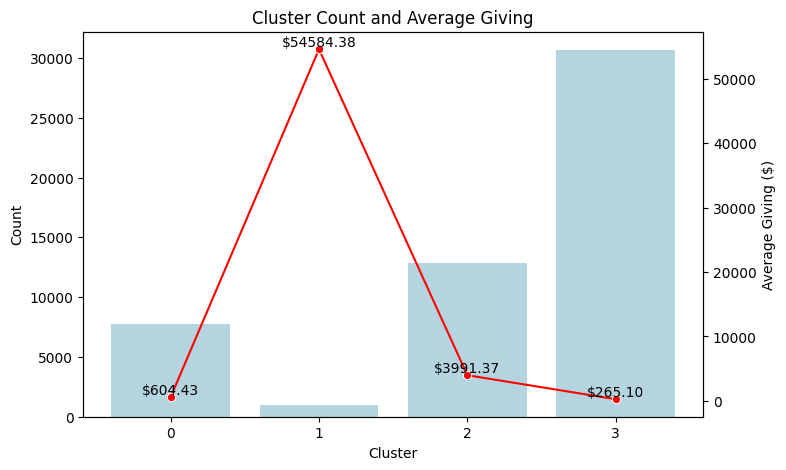

In [ ]:
# Compute the mean values for clustering features (excluding donation information)
cluster_means = df.groupby("Cluster")[features].mean()

# Compute the average 'Gies Lifetime Giving as of 1/8/25' for each cluster
giving_means = df.groupby("Cluster")["Gies Lifetime Giving as of 1/8/25"].mean()

# Compute the number of samples in each cluster
cluster_counts = df["Cluster"].value_counts().sort_index()

# Create a new DataFrame to store the count and average giving per cluster
summary_df = pd.DataFrame({"Count": cluster_counts, "Avg Giving": giving_means})

# Create a bar chart for cluster counts and overlay a line plot for average giving
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot the count of each cluster as a bar chart
sns.barplot(x=summary_df.index, y=summary_df["Count"], color="lightblue", ax=ax1)
ax1.set_ylabel("Count")
ax1.set_xlabel("Cluster")
ax1.set_title("Cluster Count and Average Giving")

# Create a secondary y-axis for average giving and plot it as a line chart
ax2 = ax1.twinx()
sns.lineplot(x=summary_df.index, y=summary_df["Avg Giving"], marker="o", color="red", ax=ax2)
ax2.set_ylabel("Average Giving ($)")

# Annotate each red dot with the corresponding average giving value
for i, txt in enumerate(summary_df["Avg Giving"]):
    ax2.text(i, txt, f"${txt:.2f}", ha="center", va="bottom", fontsize=10, color="black")

plt.show()

Paralell Plots to Show Distribution

In [ ]:
# Make sure Cluster is int type
df['Cluster'] = df['Cluster'].astype(int)

fig = px.parallel_coordinates(
    df,
    color='Cluster',
    dimensions=features,  # note that we do not use normalized data
    color_continuous_scale=px.colors.diverging.Tealrose,
    labels={col: col.replace('_', ' ') for col in features}
)

fig.update_layout(
    title="Parallel Coordinates Plot of Original Feature Values by Cluster",
    title_y=0.97,
    height=700,
    margin=dict(t=100, b=50)
)

fig.show()


In [ ]:
# in order to have a better visualization, we need to symplify the names
labels = {
    "Age Range Category": "Age",
    "Regional Category Codes": "Region",
    "BUSN Volunteer (either type) (Y/N)": "Volunteer",
    "HH Affinity Total (parent, child, spouse)": "Affinity Total",
    "fy23 Engagement excl $$": "FY23 Engage",
    "fy24 Engagement excl $$": "FY24 Engage",
    "BUSN Affiliation-Employment": "BUSN Employ",
    "BUSN Affiliation-Student Involvement": "BUSN Student",
    "Affiliation- BUSN score minus giving": "BUSN Affi-Give",
    "UIUC Affiliation minus giving": "UIUC Affi-Give",
    "UIUC Affiliation Employment": "UIUC Employ",
    "UIUC Affiliation-Student Involvement": "UIUC Student"
}
fig = px.parallel_coordinates(
    df,
    color='Cluster',
    dimensions=features,
    color_continuous_scale=px.colors.diverging.Tealrose,
    labels=labels
)
fig.show()

See some specific distribution for some features

<ipython-input-26-fbf3eafc3177>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-26-fbf3eafc3177>:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




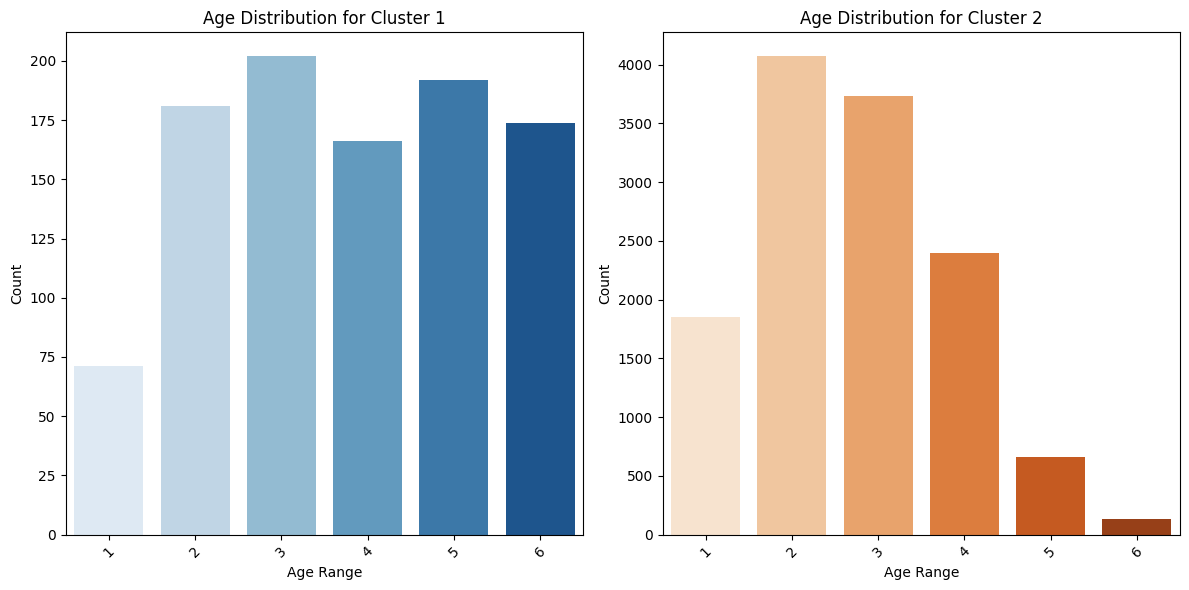

In [ ]:
# 1. visualize the age distribution separately for Cluster 1 and Cluster 2


# Filter data for clusters 1 and 2
cluster_1_df = df[df['Cluster'] == 1]
cluster_2_df = df[df['Cluster'] == 2]

# Set up the figure
plt.figure(figsize=(12, 6))

# Plot for Cluster 1
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.countplot(
    data=cluster_1_df,
    x='Age Range Category',
    palette='Blues',
)
plt.title("Age Distribution for Cluster 1")
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Plot for Cluster 2
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.countplot(
    data=cluster_2_df,
    x='Age Range Category',
    palette='Oranges',
)
plt.title("Age Distribution for Cluster 2")
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Extract the Employment Affiliation for BUSN for each cluster
cluster_1_employment = cluster_1_df['Age Range Category']
cluster_2_employment = cluster_2_df['Age Range Category']

# Perform the Kolmogorov-Smirnov test
ks_stat, ks_p_value = ks_2samp(cluster_1_employment, cluster_2_employment)

# Print the results of the test
print(f"KS-statistic: {ks_stat:.3f}")
print(f"P-value: {ks_p_value:.3f}")

# Interpret the result
if ks_p_value < 0.05:
    print("The distributions of 'Age Range Category' between Cluster 1 and Cluster 2 are significantly different.")
else:
    print("The distributions of 'Age Range Category' between Cluster 1 and Cluster 2 are not significantly different.")


KS-statistic: 0.310
P-value: 0.000
The distributions of 'Age Range Category' between Cluster 1 and Cluster 2 are significantly different.


<ipython-input-44-b8b5bcbc4021>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-44-b8b5bcbc4021>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




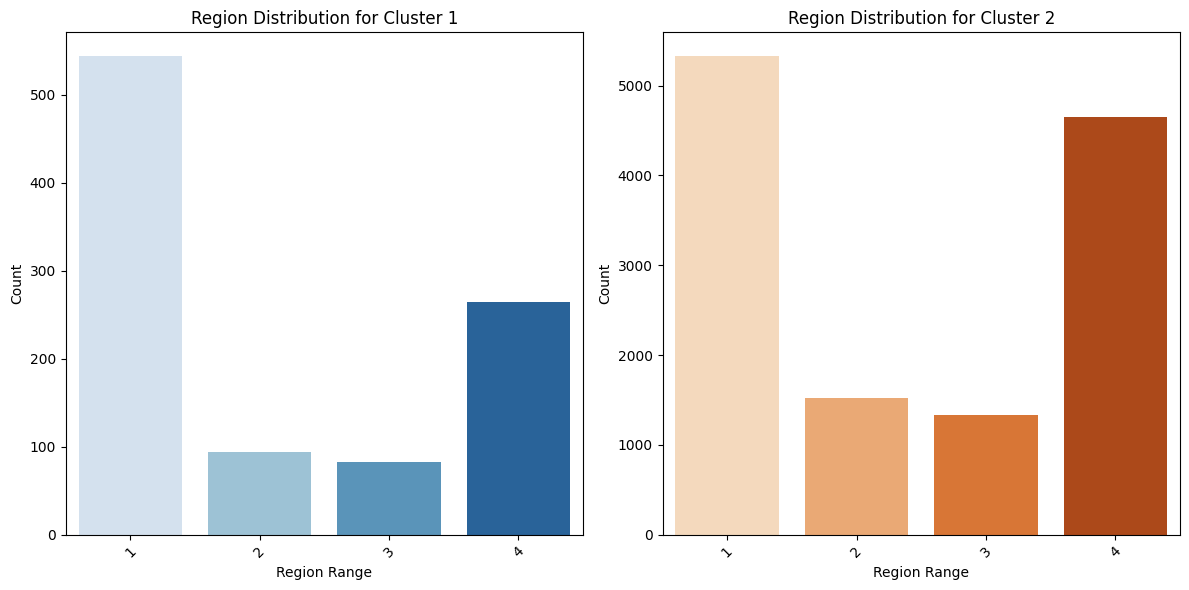

In [ ]:
# 2. visualize the region distribution separately for Cluster 1 and Cluster 2


# Set up the figure
plt.figure(figsize=(12, 6))

# Plot for Cluster 1
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.countplot(
    data=cluster_1_df,
    x='Regional Category Codes',
    palette='Blues',
)
plt.title("Region Distribution for Cluster 1")
plt.xlabel("Region Range")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Plot for Cluster 2
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.countplot(
    data=cluster_2_df,
    x='Regional Category Codes',
    palette='Oranges',
)
plt.title("Region Distribution for Cluster 2")
plt.xlabel("Region Range")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Extract the Employment Affiliation for BUSN for each cluster
cluster_1_employment = cluster_1_df['Regional Category Codes']
cluster_2_employment = cluster_2_df['Regional Category Codes']

# Perform the Kolmogorov-Smirnov test
ks_stat, ks_p_value = ks_2samp(cluster_1_employment, cluster_2_employment)

# Print the results of the test
print(f"KS-statistic: {ks_stat:.3f}")
print(f"P-value: {ks_p_value:.3f}")

# Interpret the result
if ks_p_value < 0.05:
    print("The distributions of 'Regional Category Codes' between Cluster 1 and Cluster 2 are significantly different.")
else:
    print("The distributions of 'Regional Category Codes' between Cluster 1 and Cluster 2 are not significantly different.")


KS-statistic: 0.137
P-value: 0.000
The distributions of 'Regional Category Codes' between Cluster 1 and Cluster 2 are significantly different.


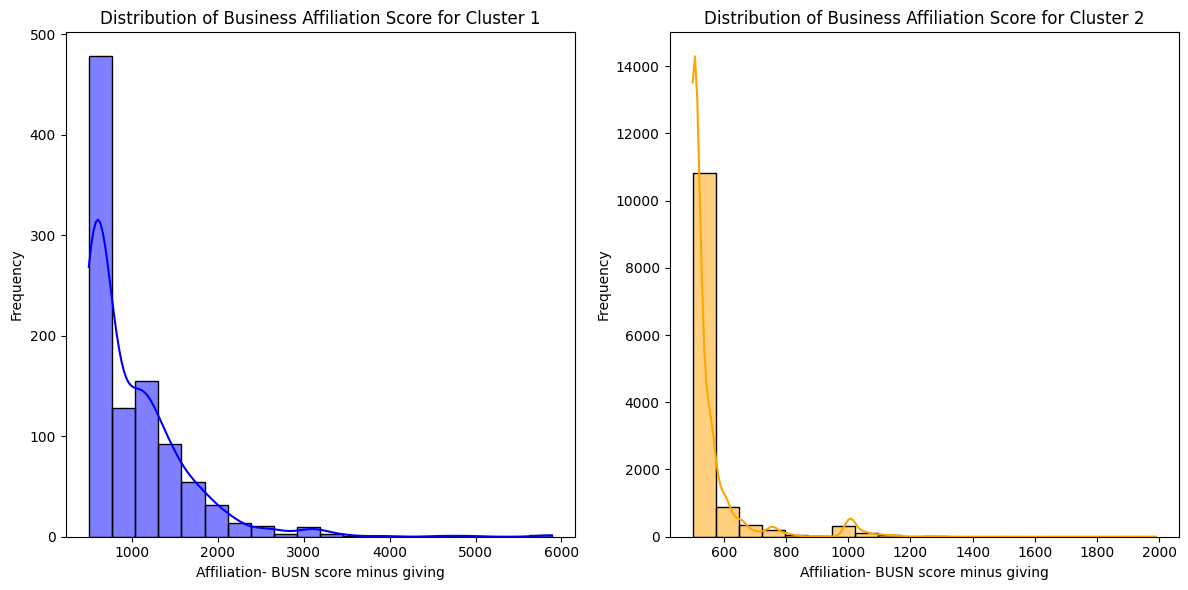

In [ ]:
# 3. Visualize the distribution of the Business Affiliation Score for cluster 1, 2
# And compare the averages using a statistical test

# Set up the figure
plt.figure(figsize=(12, 6))

# Plot for Cluster 1
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.histplot(cluster_1_df['Affiliation- BUSN score minus giving'], kde=True, color='blue', bins=20)
plt.title("Distribution of Business Affiliation Score for Cluster 1")
plt.xlabel("Affiliation- BUSN score minus giving")
plt.ylabel("Frequency")

# Plot for Cluster 2
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.histplot(cluster_2_df['Affiliation- BUSN score minus giving'], kde=True, color='orange', bins=20)
plt.title("Distribution of Business Affiliation Score for Cluster 2")
plt.xlabel("Affiliation- BUSN score minus giving")
plt.ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Extract the Business Affiliation Score for each cluster
cluster_1_score = cluster_1_df['Affiliation- BUSN score minus giving']
cluster_2_score = cluster_2_df['Affiliation- BUSN score minus giving']

# Perform the Kolmogorov-Smirnov test
ks_stat, ks_p_value = ks_2samp(cluster_1_score, cluster_2_score)

# Print the results
print(f"KS-statistic: {ks_stat:.3f}")
print(f"P-value: {ks_p_value:.3f}")

# Interpret the result
if ks_p_value < 0.05:
    print("The distributions of 'Business Affiliation Score' between Cluster 1 and Cluster 2 are significantly different.")
else:
    print("The distributions of 'Business Affiliation Score' between Cluster 1 and Cluster 2 are not significantly different.")


KS-statistic: 0.624
P-value: 0.000
The distributions of 'Business Affiliation Score' between Cluster 1 and Cluster 2 are significantly different.


The p-value means that the distributions difference of BUSN score minus giving  between cluster 1 and 2 is significantly different.

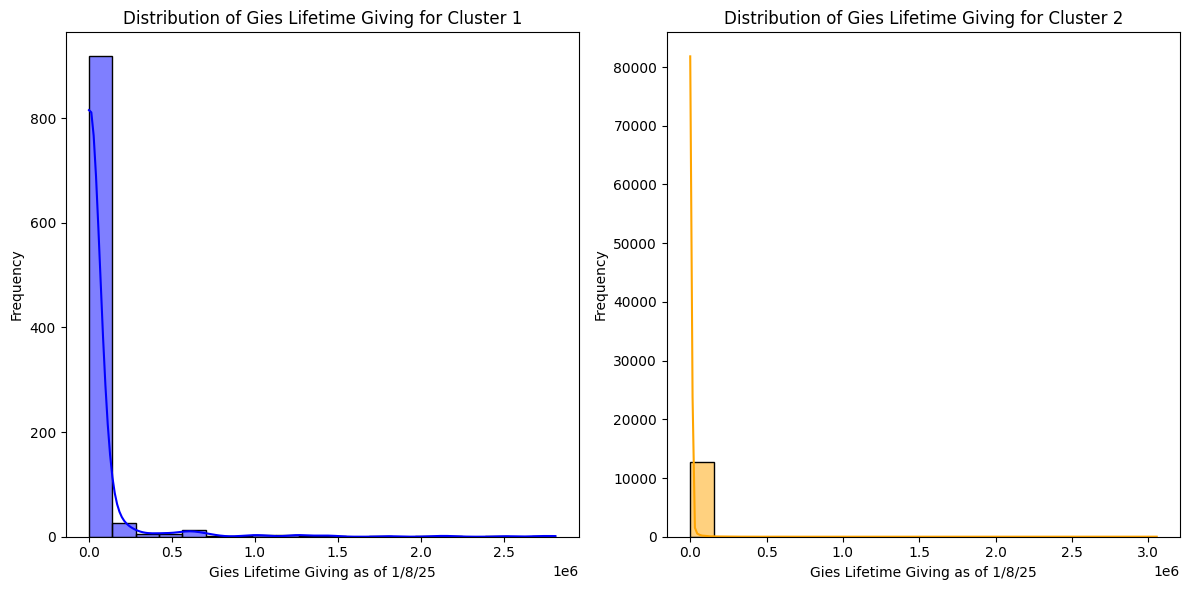

In [ ]:
# 4. Is the giving distribution also significantly different for cluster 1 and 2?


# Gies Lifetime Giving as of 1/8/25
# Set up the figure
plt.figure(figsize=(12, 6))

# Plot for Cluster 1
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.histplot(cluster_1_df['Gies Lifetime Giving as of 1/8/25'], kde=True, color='blue', bins=20)
plt.title("Distribution of Gies Lifetime Giving for Cluster 1")
plt.xlabel("Gies Lifetime Giving as of 1/8/25")
plt.ylabel("Frequency")

# Plot for Cluster 2
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.histplot(cluster_2_df['Gies Lifetime Giving as of 1/8/25'], kde=True, color='orange', bins=20)
plt.title("Distribution of Gies Lifetime Giving for Cluster 2")
plt.xlabel("Gies Lifetime Giving as of 1/8/25")
plt.ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()



In [ ]:
# Extract the 'Gies Lifetime Giving as of 1/8/25' for each cluster
cluster_1_giving = cluster_1_df['Gies Lifetime Giving as of 1/8/25']
cluster_2_giving = cluster_2_df['Gies Lifetime Giving as of 1/8/25']

# Perform the Kolmogorov-Smirnov test
ks_stat, ks_p_value = ks_2samp(cluster_1_giving, cluster_2_giving)

# Print the results
print(f"KS-statistic: {ks_stat:.3f}")
print(f"P-value: {ks_p_value:.3f}")

# Interpret the result
if ks_p_value < 0.05:
    print("The distributions of 'Gies Lifetime Giving' between Cluster 1 and Cluster 2 are significantly different.")
else:
    print("The distributions of 'Gies Lifetime Giving' between Cluster 1 and Cluster 2 are not significantly different.")


KS-statistic: 0.229
P-value: 0.000
The distributions of 'Gies Lifetime Giving' between Cluster 1 and Cluster 2 are significantly different.


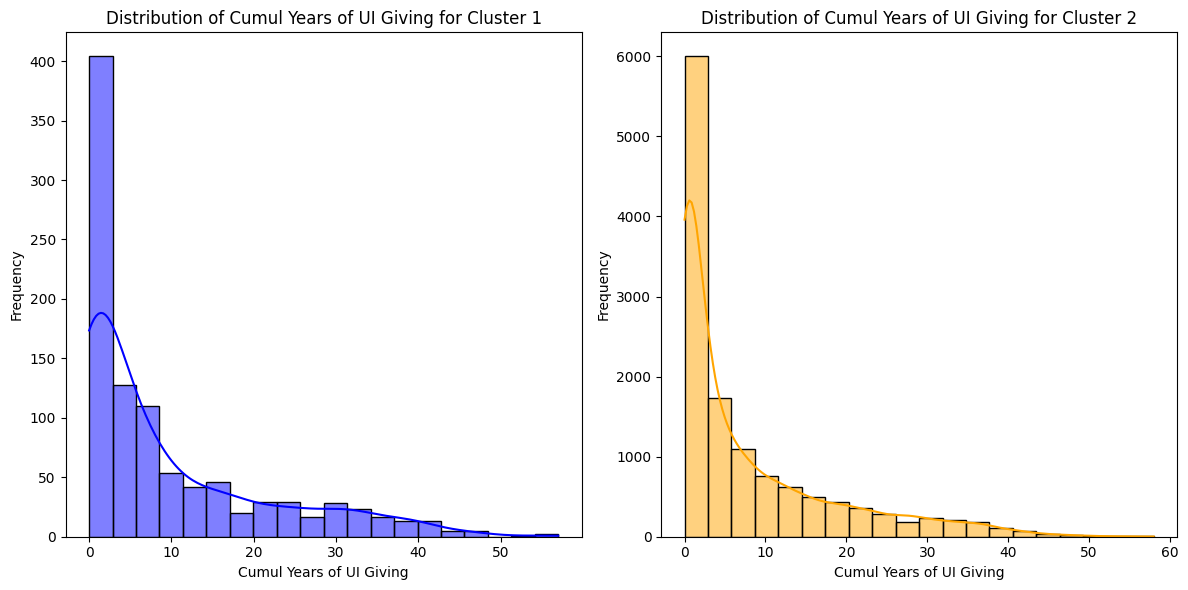

In [ ]:
# Cumul Years of UI Giving

# Set up the figure
plt.figure(figsize=(12, 6))

# Plot for Cluster 1
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.histplot(cluster_1_df['Cumul Years of UI Giving'], kde=True, color='blue', bins=20)
plt.title("Distribution of Cumul Years of UI Giving for Cluster 1")
plt.xlabel("Cumul Years of UI Giving")
plt.ylabel("Frequency")

# Plot for Cluster 2
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.histplot(cluster_2_df['Cumul Years of UI Giving'], kde=True, color='orange', bins=20)
plt.title("Distribution of Cumul Years of UI Giving for Cluster 2")
plt.xlabel("Cumul Years of UI Giving")
plt.ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Extract the 'Cumul Years of UI Giving' for each cluster
cluster_1_years = cluster_1_df['Cumul Years of UI Giving']
cluster_2_years = cluster_2_df['Cumul Years of UI Giving']

# Perform the Kolmogorov-Smirnov test
ks_stat, ks_p_value = ks_2samp(cluster_1_years, cluster_2_years)

# Print the results
print(f"KS-statistic: {ks_stat:.3f}")
print(f"P-value: {ks_p_value:.3f}")

# Interpret the result
if ks_p_value < 0.05:
    print("The distributions of 'Cumul Years of UI Giving' between Cluster 1 and Cluster 2 are significantly different.")
else:
    print("The distributions of 'Cumul Years of UI Giving' between Cluster 1 and Cluster 2 are not significantly different.")



KS-statistic: 0.063
P-value: 0.001
The distributions of 'Cumul Years of UI Giving' between Cluster 1 and Cluster 2 are significantly different.


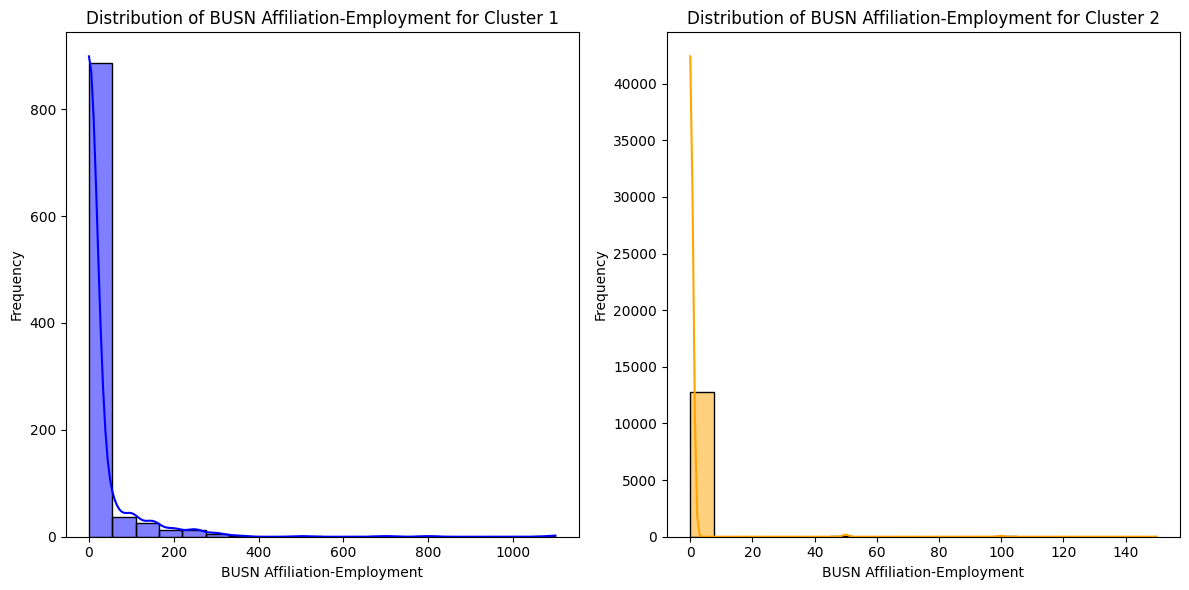

In [ ]:
# 5. BUSN Affiliation-Employment distribution for cluster 1 and 2


# Set up the figure
plt.figure(figsize=(12, 6))

# Plot for Cluster 1
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.histplot(cluster_1_df['BUSN Affiliation-Employment'], kde=True, color='blue', bins=20)
plt.title("Distribution of BUSN Affiliation-Employment for Cluster 1")
plt.xlabel("BUSN Affiliation-Employment")
plt.ylabel("Frequency")

# Plot for Cluster 2
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.histplot(cluster_2_df['BUSN Affiliation-Employment'], kde=True, color='orange', bins=20)
plt.title("Distribution of BUSN Affiliation-Employment for Cluster 2")
plt.xlabel("BUSN Affiliation-Employment")
plt.ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Extract the Employment Affiliation for BUSN for each cluster
cluster_1_employment = cluster_1_df['BUSN Affiliation-Employment']
cluster_2_employment = cluster_2_df['BUSN Affiliation-Employment']

# Perform the Kolmogorov-Smirnov test
ks_stat, ks_p_value = ks_2samp(cluster_1_employment, cluster_2_employment)

# Print the results of the test
print(f"KS-statistic: {ks_stat:.3f}")
print(f"P-value: {ks_p_value:.3f}")

# Interpret the result
if ks_p_value < 0.05:
    print("The distributions of 'BUSN Affiliation-Employment' between Cluster 1 and Cluster 2 are significantly different.")
else:
    print("The distributions of 'BUSN Affiliation-Employment' between Cluster 1 and Cluster 2 are not significantly different.")


KS-statistic: 0.152
P-value: 0.000
The distributions of 'BUSN Affiliation-Employment' between Cluster 1 and Cluster 2 are significantly different.


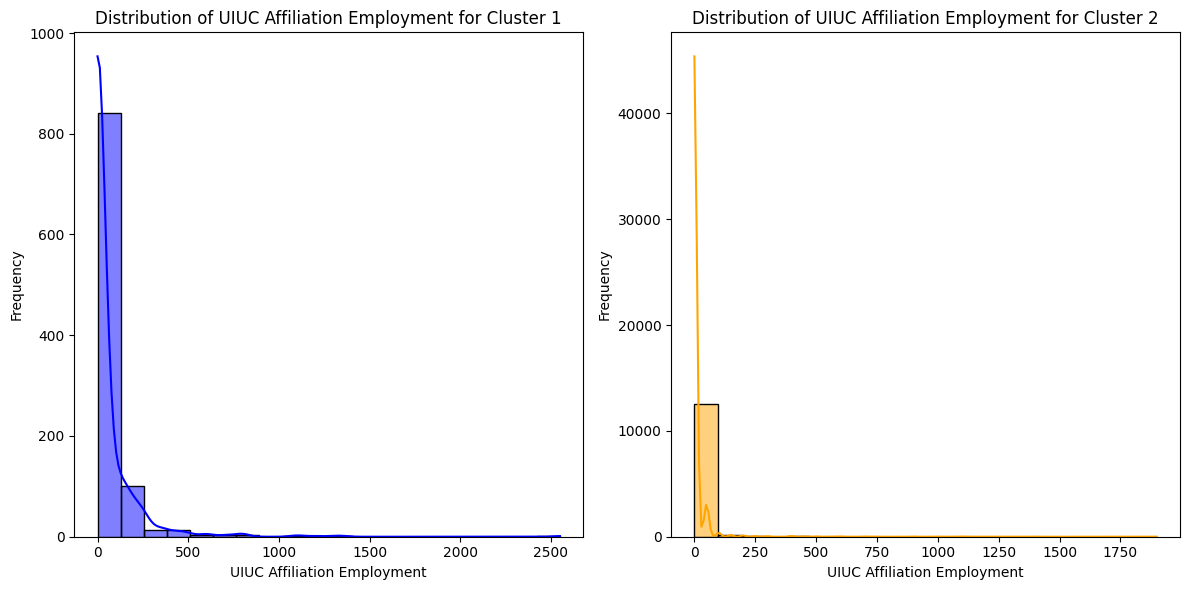

In [ ]:
# 6. UIUC Affiliation Employment distribution for cluster 1 and 2

# Set up the figure
plt.figure(figsize=(12, 6))

# Plot for Cluster 1
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.histplot(cluster_1_df['UIUC Affiliation Employment'], kde=True, color='blue', bins=20)
plt.title("Distribution of UIUC Affiliation Employment for Cluster 1")
plt.xlabel("UIUC Affiliation Employment")
plt.ylabel("Frequency")

# Plot for Cluster 2
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.histplot(cluster_2_df['UIUC Affiliation Employment'], kde=True, color='orange', bins=20)
plt.title("Distribution of UIUC Affiliation Employment for Cluster 2")
plt.xlabel("UIUC Affiliation Employment")
plt.ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Extract the 'UIUC Affiliation Employment' for each cluster
cluster_1_uiuc_employment = cluster_1_df['UIUC Affiliation Employment']
cluster_2_uiuc_employment = cluster_2_df['UIUC Affiliation Employment']

# Perform the Kolmogorov-Smirnov test
ks_stat, ks_p_value = ks_2samp(cluster_1_uiuc_employment, cluster_2_uiuc_employment)

# Print the results of the test
print(f"KS-statistic: {ks_stat:.3f}")
print(f"P-value: {ks_p_value:.3f}")

# Interpret the result
if ks_p_value < 0.05:
    print("The distributions of 'UIUC Affiliation Employment' between Cluster 1 and Cluster 2 are significantly different.")
else:
    print("The distributions of 'UIUC Affiliation Employment' between Cluster 1 and Cluster 2 are not significantly different.")


KS-statistic: 0.191
P-value: 0.000
The distributions of 'UIUC Affiliation Employment' between Cluster 1 and Cluster 2 are significantly different.


Now we want to get the IDs sheets for each cluster

In [ ]:
!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 5.5 MB/s eta 0:00:00


In [ ]:
output_path = "Cluster_IDs_by_Group.xlsx"

with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    for cluster_num in sorted(df['Cluster'].unique()):
        # Filter for current cluster
        cluster_df = df[df['Cluster'] == cluster_num]

        # keep ID column and giving colums
        id_df = cluster_df[['Individual LookupID', 'Gies Lifetime Giving as of 1/8/25', 'Cumul Years of UI Giving']]

        # Write to a sheet named after the cluster
        id_df.to_excel(writer, sheet_name=f"Cluster_{cluster_num}", index=False)

print(f"Excel file saved to: {output_path}")


Excel file saved to: Cluster_IDs_by_Group.xlsx


In [ ]:
from google.colab import files
files.download("Cluster_IDs_by_Group.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>